# Week 1 - Revision

## 1.1 Linear Regression

During the lecture we used a running example of house prices. This dataset is known as the "house prices" dataset. The task to be done is to predict the price of a house given some 'features' of the house. Our input data comprises two features per sample (size of the house, and number of rooms), while the output data is the price of each sample.

Here is the data:

| Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |
|:------ |:----|:----------|:------ |:----|:----------|:------ |:----|:----------|:------ |:----|:----------|
| 2104.0 | 3.0 |  **399900.0** | 1890.0 | 3.0 |  **329999.0** | 3890.0 | 3.0 |  **573900.0** | 1239.0 | 3.0 |  **229900.0** |
| 1600.0 | 3.0 |  **329900.0** | 4478.0 | 5.0 |  **699900.0** | 1100.0 | 3.0 |  **249900.0** | 2132.0 | 4.0 |  **345000.0** |
| 2400.0 | 3.0 |  **369000.0** | 1268.0 | 3.0 |  **259900.0** | 1458.0 | 3.0 |  **464500.0** | 4215.0 | 4.0 |  **549000.0** | 
| 1416.0 | 2.0 |  **232000.0** | 2300.0 | 4.0 |  **449900.0** | 2526.0 | 3.0 |  **469000.0** | 2162.0 | 4.0 |  **287000.0** |
| 3000.0 | 4.0 |  **539900.0** | 1320.0 | 2.0 |  **299900.0** | 2200.0 | 3.0 |  **475000.0** | 1664.0 | 2.0 |  **368500.0** | 
| 1985.0 | 4.0 |  **299900.0** | 1236.0 | 3.0 |  **199900.0** | 2637.0 | 3.0 |  **299900.0** | 2238.0 | 3.0 |  **329900.0** | 
| 1534.0 | 3.0 |  **314900.0** | 2609.0 | 4.0 |  **499998.0** | 1839.0 | 2.0 |  **349900.0** | 2567.0 | 4.0 |  **314000.0** | 
| 1427.0 | 3.0 |  **198999.0** | 3031.0 | 4.0 |  **599000.0** | 1000.0 | 1.0 |  **169900.0** | 1200.0 | 3.0 |  **299000.0** | 
| 1380.0 | 3.0 |  **212000.0** | 1767.0 | 3.0 |  **252900.0** | 2040.0 | 4.0 |  **314900.0** | 852.0  | 2.0 |  **179900.0** | 
| 1494.0 | 3.0 |  **242500.0** | 1888.0 | 2.0 |  **255000.0** | 3137.0 | 3.0 |  **579900.0** | 1852.0 | 4.0 |  **299900.0** | 
| 1940.0 | 4.0 |  **239999.0** | 1604.0 | 3.0 |  **242900.0** | 1811.0 | 4.0 |  **285900.0** | 1203.0 | 3.0 |  **239500.0** | 
| 2000.0 | 3.0 |  **347000.0** | 1962.0 | 4.0 |  **259900.0** | 1437.0 | 3.0 |  **249900.0** | 
 
Let's first get them into Python. For simplification we are going to use only one feature for the time being - the size of the house.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
size = np.array([2104., 1600., 2400., 1416., 3000., 1985., 1534., 1427., 1380., 
       1494., 1940., 2000., 1890., 4478., 1268., 2300., 1320., 1236.,
       2609., 3031., 1767., 1888., 1604., 1962., 3890., 1100., 1458.,
       2526., 2200., 2637., 1839., 1000., 2040., 3137., 1811., 1437.,
       1239., 2132., 4215., 2162., 1664., 2238., 2567., 1200.,  852.,
       1852., 1203.])

rooms = np.array([3., 3., 3., 2., 4., 4., 3., 3., 3., 3., 4., 3., 3., 5., 3., 4., 2.,
       3., 4., 4., 3., 2., 3., 4., 3., 3., 3., 3., 3., 3., 2., 1., 4., 3.,
       4., 3., 3., 4., 4., 4., 2., 3., 4., 3., 2., 4., 3.])

price = np.array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

First, let's see what we have

We have been given 47 samples


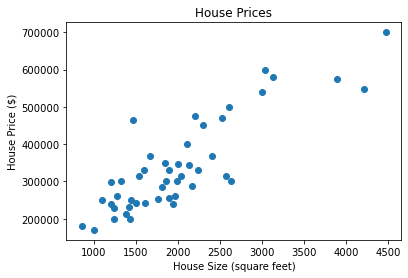

In [4]:
m = len(size)
print("We have been given {} samples".format(m))

# Plot sample points (price vs size)
plt.plot(size, price, 'o')
plt.title('House Prices')
plt.xlabel('House Size (square feet)')
plt.ylabel('House Price ($)')
plt.show()

We want to automatically find a model to predict prices $y$ for houses that are not in our dataset. In linear regression, the model $f$ is a linear function of the input data ($x$, in our case the house size):

> $f_w(x) = w_0 + w_1 x$

For this we need to choose the parameters $w_i$ minimizing a cost function $J$ e.g. the average squared difference between the predictions ($f_w$) and the real prices ($y$) in our training data:

> $\hat{w} = \underset{w}{\text{minimize}} {1 \over 2m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)})^2}$

where $(x^{(i)},y^{(i)})$ is the i-th training sample, and $m$ is the number of samples in our training set.

This optimization problem can be solved in different ways, in this example we are going to implement the Gradient Descent algorithm. In pseudo-code the Gradient Descent algorithm is formalized as follows:

repeat until convergence:

> {
> 
> $w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w)$ (for all j)
>
> }

where $\alpha$ is the learning rate, and the partial derivative (the gradient) of the cost function is given by (generic expression):

> $\frac{\partial}{\partial w_j} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)}) x_j^{(i)}}$

In our case, the partial derivatives for $w_0$ and $w_1$ are:

> $\frac{\partial}{\partial w_0} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)})}$

> $\frac{\partial}{\partial w_1} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)}) x^{(i)}}$

Let's see a first (very inefficient, but quite explicit) version of the Gradient Descent algorithm in Python:

In [5]:
def GradientDescent(x, y, max_iterations=100, lr=0.01):
    m = len(x) # number of samples
    J = np.zeros(max_iterations)
   
    #initialize the parameters to zero (or any other random value)
    w0 = 0
    w1 = 0
    
    for it in range(max_iterations): #lets take a max of max_iteration steps updating the parameters
        s0 = 0 # We will use this to calculate the sum of derivatives over the different samples
        s1 = 0
        for i in range(m): #Go over the points and calculate the sum
            f = w0 + w1 * x[i]
            s0 = s0 + (f - y[i])
            s1 = s1 + (f - y[i])* x[i]
            J[it] = J[it]+(f - y[i])**2
        Grad0 = s0 / m # Now get the average
        Grad1 = s1 / m 
        J[it] /= 2*m
        
        w0 = w0 - lr * Grad0
        w1 = w1 - lr * Grad1
        
    return [w0, w1], J

Estimated weights: [0.08050805332714407, 163.9249033496211]


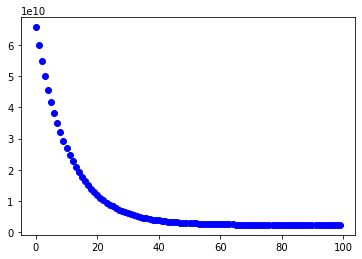

In [6]:
# Run gradient descent on our data
w, J = GradientDescent(x = size, y = price, max_iterations=100, lr=0.00000001)

print("Estimated weights:", w)
plt.plot(np.arange(len(J)), J, 'bo')
plt.show()

Do a scatter plot of our data points and plot the linear function we fit using the weights that we calculated

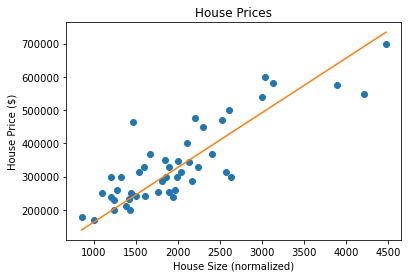

In [7]:
# Plot sample points.
plt.plot(size, price,'o') # plot dots ('o') for each sample (house size, house price)
plt.title('House Prices')
plt.xlabel('House Size (normalized)')
plt.ylabel('House Price ($)')

# Plot line f = w0 + w1 * x
xx = range(int(min(size)),int(max(size)))
yy = [w[0] + w[1] * x for x in xx]
plt.plot(xx,yy)
plt.show()

<br>

<font color=blue>**Exercise:** Use the model you have calculated to predict the price of a house with `size = 3200` square feet.</font>

In [8]:
# Your Code Here #
X = 3200
print(w[0]+X*w[1])

524559.7712268408


<font color=blue>**Exercise:** Use the above function with different initial values for the weights. What do you observe?</font>

In [9]:
def GradientDescent_modificado(x, y, w00, w10, max_iterations=100, lr=0.01):
    m = len(x) # number of samples
    J = np.zeros(max_iterations)
   
    #initialize the parameters to zero (or any other random value)
    w0 = w00
    w1 = w10
    
    for it in range(max_iterations): #lets take a max of max_iteration steps updating the parameters
        s0 = 0 # We will use this to calculate the sum of derivatives over the different samples
        s1 = 0
        for i in range(m): #Go over the points and calculate the sum
            f = w0 + w1 * x[i]
            s0 = s0 + (f - y[i])
            s1 = s1 + (f - y[i])* x[i]
            J[it] = J[it]+(f - y[i])**2
        Grad0 = s0 / m # Now get the average
        Grad1 = s1 / m 
        J[it] /= 2*m
        
        w0 = w0 - lr * Grad0
        w1 = w1 - lr * Grad1
        
    return [w0, w1], J

In [10]:
w0 = [3,7,12]
w1 = [1, 20, 32]
for i,j in zip(w0, w1):
    w, J = GradientDescent_modificado(x = size, y = price, w00 = i, w10 = j, max_iterations=100, lr=0.00000001)
    print("Estimated weights:", w)

Estimated weights: [3.0800779432387326, 163.93243366630622]
Estimated weights: [7.071922789090105, 164.0982547054172]
Estimated weights: [12.06677137488704, 164.20192219780668]


---

*Answer*

The value of the parameter w0 depends on the initial value. Whereas the value of the parameter w1 is independent of the initial value, it will converges to 164 aproximately.

---


<font color=blue>**Exercise:** Now normalise your data and do the gradient descent again. Adjust the number of iterations and the learning rate as you see fit. What do you observe in terms of the learning rate required? What do you observe in terms of the final values obtained for the weights?</font>

In [11]:
def normalize(x):
    m = np.mean(x)
    d = np.std(x)
    return (x-m)/d

Estimated weights: [340397.2825377021, 105759.35721856821]


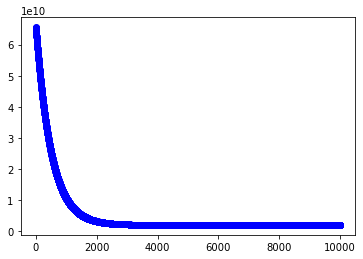

In [12]:
X = normalize(size)

w, J = GradientDescent_modificado(x = X, y = price, w00 = i, w10 = j, max_iterations=10000, lr=0.001)

print("Estimated weights:", w)
plt.plot(np.arange(len(J)), J, 'bo')
plt.show()

---

*Answer*

The learning rate does not need to be so small anymore. We can now find a "reasonable" value for the learning rate.

The initial value for $w_0$ is not so important anymore, the learning rate works for both weights.

The weight values we obtain are very different than before (much larger)

---

<font color=blue>**Exercise:** Do a scatter plot of your data and a plot of the line you just estimaged. Then use the model you have calculated to predict the price of a house with size = 3200 square feet. </font>

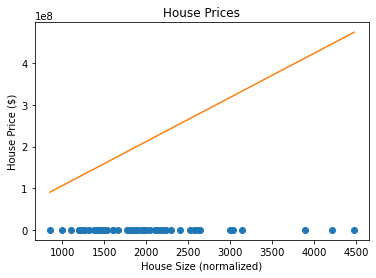

In [13]:
# Plot sample points.
plt.plot(size, price,'o') # plot dots ('o') for each sample (house size, house price)
plt.title('House Prices')
plt.xlabel('House Size (normalized)')
plt.ylabel('House Price ($)')

# Plot line f = w0 + w1 * x
xx = range(int(min(size)),int(max(size)))
yy = [w[0] + w[1] * x for x in xx]
plt.plot(xx,yy)
plt.show()

<br>

There are existing implementations for linear regression available for Python. For example, using the sklearn module's implementation, it would be:

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(size).reshape(-1, 1)
y = price

reg = LinearRegression().fit(x, y)

print('The estimated value of theta 0 (the intercept of the line) is: {0}'.format(reg.intercept_))
print('The estimated value of theta 1 (the slope) is: {0}'.format(reg.coef_[0]))

print('The estimated price for a house with size = 3200 using the model would be: {0}'.format(reg.predict([[3200]])))

The estimated value of theta 0 (the intercept of the line) is: 71270.49244872911
The estimated value of theta 1 (the slope) is: 134.52528772024132
The estimated price for a house with size = 3200 using the model would be: [501751.4131535]


<br>

<font color=blue>**Exercise:** Have a look at the help pages for the `LinearRegression()` function of `sklearn`, as well as a read of the help page of the function [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) </font>

## 1.2 Writing our Gradient Descent in a more efficient way, and Multiple regression

We will rewrite the gradient descent function, vectorising our variables and most of our for loops and including a stopping criterion that checks for convergence. Have a look at the explanatory notebook if you cannot understand how the following line works:

`grad = np.dot(X.T , (np.dot(X,theta) - y)) / m;`

Where `X` is the input (the Design Matrix) `y` is the vector column of the output, and `w` is a vector column of the parameters.

In [15]:
def GradientDescent_np(X, y, max_iterations=10000, lr=0.1, epsilon = 0.000001):
    m, n = X.shape # number of samples, number of features
    J = []

    #initialize the weights to zero (or anything else you want, e.g. a small random value)
    w = np.zeros(n)
    
    # Repeat until convergence (or max_iterations)
    for iteration in range(max_iterations):
        grad = np.dot(X.T , (np.dot(X, w) - y)) / m;
        w = w - lr*grad
        J.append(sum( (np.dot(X, w) - y)**2) / m)
        
        # Stopping Criterion
        if (iteration > 2) and ( abs(J[-2] - J[-1]) < epsilon):
            print ("Gradient Descent converged after {} iterations".format(iteration))
            break
    return w, J

Let's use the new version of Gradient Descent to calculate the parameter values . In order to do so, we have to create our design matrix `X` and feed it to the function. As a reminder, the design matrix should have as many rows as samples and as many columns as features (including the "fake" $x_0$ feature of ones, that is multiplied with the bias term).

First few rows of our design matrix:
[[1.000e+00 2.104e+03]
 [1.000e+00 1.600e+03]
 [1.000e+00 2.400e+03]
 [1.000e+00 1.416e+03]]
First few rows of our normalised design matrix:
[[ 1.          0.13000987]
 [ 1.         -0.50418984]
 [ 1.          0.50247636]
 [ 1.         -0.73572306]]
Gradient Descent converged after 177 iterations
Estimated weights: [340412.65713569 106907.56159506]


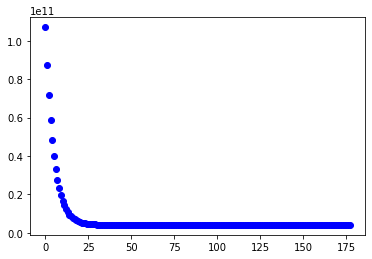

In [16]:
#prepare the design matrix, starting with a column of ones (this is the x_0 for the bias term), and concatenating the size feature
X = np.hstack( (np.ones(shape=(size.shape[0], 1)), size.reshape(size.shape[0], 1)))

#Let's print out a few samples to verify we have done this right
print("First few rows of our design matrix:")
print(X[0:4, :])

# Scale features and set them to zero mean (standarize)
mu = np.mean(X, 0) #calculate the mean for every column
sigma = np.std(X, 0, ddof=1) #calculate the standard deviation for every column

#normalize only X1. Do not normalise X0 (the artificial first feature that we set to ones)
X[:,1] = (X[:,1] - mu[1]) / sigma[1];

#Let's print out a few samples to verify we have done this right
print("First few rows of our normalised design matrix:")
print(X[0:4, :])

w, J = GradientDescent_np(X, price, lr=0.1)
print('Estimated weights:', w)

plt.plot(np.arange(len(J)), J, 'bo')
plt.show()

<font color=blue>**Exercise:** Do the same, but this time using the rooms feature as well</font>

First few rows of our design matrix:
[[1.000e+00 2.104e+03 3.000e+00]
 [1.000e+00 1.600e+03 3.000e+00]
 [1.000e+00 2.400e+03 3.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]]
First few rows of our normalised design matrix:
[[ 1.          0.13000987 -0.22609337]
 [ 1.         -0.50418984 -0.22609337]
 [ 1.          0.50247636 -0.22609337]
 [ 1.         -0.73572306 -1.5543919 ]]
Gradient Descent converged after 364 iterations
Estimated weights: [340412.65957447 110631.04501772  -6578.3496931 ]


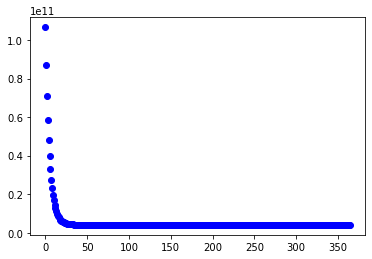

In [17]:
X = np.hstack( (np.ones(shape=(size.shape[0], 1)), size.reshape(size.shape[0], 1), rooms.reshape(rooms.shape[0], 1) ) )

#Let's print out a few samples to verify we have done this right
print("First few rows of our design matrix:")
print(X[0:4, :])

# Scale features and set them to zero mean (standarize)
mu = np.mean(X, 0) #calculate the mean for every column
sigma = np.std(X, 0, ddof=1) #calculate the standard deviation for every column

#normalize only X1. Do not normalise X0 (the artificial first feature that we set to ones)
X[:,1] = (X[:,1] - mu[1]) / sigma[1];
X[:,2] = normalize(X[:,2])

#Let's print out a few samples to verify we have done this right
print("First few rows of our normalised design matrix:")
print(X[0:4, :])

w, J = GradientDescent_np(X, price, lr=0.1)
print('Estimated weights:', w)

plt.plot(np.arange(len(J)), J, 'bo')
plt.show()

## 1.3 Polynomial Regression

Suppose you are given the following samples for a problem:

In [18]:
# This is a single feature, with 50 data points
feat = np.array([ 3.69, -0.01,  3.92,  3.76,  4.77,  2.65, -3.2 , -3.68,  4.84,
        2.35, -3.46,  3.36,  0.05, -2.43,  4.5 ,  2.99, -4.58, -2.38,
        4.75, -0.99,  2.43,  1.03, -0.91,  0.49, -1.07, -4.56,  2.7 ,
       -1.89, -4.46, -3.22,  4.11, -1.4 , -2.15, -3.08,  1.22,  4.15,
       -3.32, -0.96,  2.28, -0.22,  1.63, -3.16,  0.57,  1.12,  0.46,
       -4.42, -1.98, -4.59, -3.27,  3.77])

# And this is the output for each of the 50 data points
out = np.array([ -4.01526321,   4.91472839,  -6.45656423,  -2.62612898,
        -8.51413128,   3.34151409,  12.88771229,  34.65904607,
       -13.35431265,   4.30981981,  21.88485042,   1.12385015,
        -2.91774249,  14.50057692,  -1.24198533,  -4.55757528,
        45.46247156,   8.26033485, -17.30334323,  -9.70654351,
       -11.24523311, -10.24578944,   2.52139723,   9.46442395,
        -2.6732785 ,  47.77493771,  -1.3560507 ,  -3.87657515,
        47.12672411,  19.07990287,  -0.9455647 ,   0.35427309,
         9.80390966,  19.42353943,   3.11970979,   3.44865065,
        21.42035593,  -7.88242488,   5.64544367,  10.20227577,
        -0.62195752,  14.75901715,   9.12831525,   7.21057155,
         4.53708356,  45.98559999,  -3.86594125,  50.79311745,
        25.99250789,  -3.46524068])

Let's make a plot of the above samples

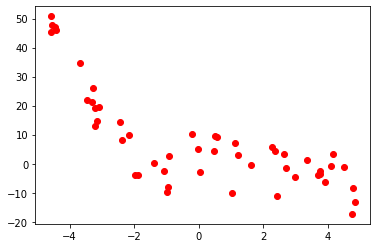

In [19]:
plt.plot(feat, out, 'ro') # Plot the feature versus the output, using big red circles
plt.show()

In order to use the linear gradient descent above to fit a polynomial, what we have to do is generate new features, from the existing ones. For example we could generate a new feature $feat_2$ and calculate its values as the square of $feat$: $feat_2 = feat^2$.

Similarly we could create more new features like:

$feat_3 = feat^3$

$feat_4 = feat^4$

$...$

Let's create such new features. We will first define a helper function for that, that generates and normalises features up to the desired degree.

In [20]:
def map_feature_and_normalise(x, degree = 6, mu = None, sigma = None):
    '''
    Maps a single 1D feature to polynomial features up to the degree given
    Returns a new feature vector comprising of [1, x, x^2, x^3, ..., x^degree]
    If means and sigmas are passed, they are used for the normalisation, otherwise they are calculated from the data
    '''
    
    x = x.reshape((x.size, 1)) #make into a vector if it has any other shape. The function size returns the number of elements in an array
    out = np.ones(shape=(x.shape[0], 1))
    
    for i in range(1, degree + 1):
            r = (x ** i)
            out = np.append(out, r, axis=1)

    # Normalise the newly created features
    if not isinstance(mu, np.ndarray): # This basically asks "if (mu == None)", but in a way that it would work also in the case that mu is an array
        mu = np.mean(out, 0) #calculate the mean for every column
    if not isinstance(sigma, np.ndarray):
        sigma = np.std(out, 0, ddof=1) #calculate the standard deviation for every column

    # Scale features and set them to zero mean (standarize)
    # Normalize everything except X0 (the artificial first feature that we set to ones)
    for i in range(1, out.shape[1]):
        out[:,i] = (out[:,i] - mu[i]) / sigma[i];

    return out, mu, sigma

Let's try it out, by creating new features up to degree `deg` out of our single feature `feat`. What we expect to get in the output is $deg+1$ features, as we are also counting the feature $x_0$

In [21]:
deg = 6
X, mu, sigma = map_feature_and_normalise(feat, deg)

print("The shape of our design matrix is:", X.shape)
print("The shape of mu (and sigma) is:", mu.shape)

The shape of our design matrix is: (50, 7)
The shape of mu (and sigma) is: (7,)


Let's now use our gradient descent function to fit a 2-degree polynomial model to the same data. To do this, we should pass to the function the set of features up to the power of 2, so our design matrix would comprise three features: $[1, feat, feat^2]$

Gradient Descent converged after 46 iterations
Estimated weights: [  7.84508161 -13.60617806   7.01741506]


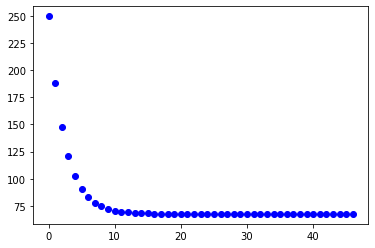

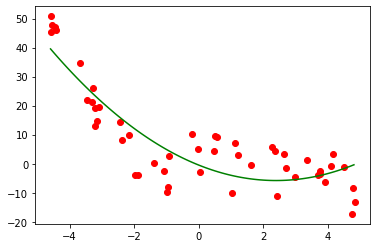

In [22]:
deg = 2
X, mu, sigma = map_feature_and_normalise(feat, deg)

w, J = GradientDescent_np(X, out, lr=0.2)
print('Estimated weights:', w)  # Since we passed it three features, we expect to receive values for three weights

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')  # To plot the evolution of the Cost (J) we use as x a list of numbers from 1 to the number of elements inside J, and as y the values in J

# Plot line y = theta_0 + theta_1 * x + theta_2 * x^2
plt.figure() # We first create a new figure, otherwise it will include this plot in the previous one
plt.plot(feat, out, 'ro') # Here we plot the original feature vs out of our data as big red circles

# To plot our solution, we need to use the weights we have been given and calculate our estimated output for a series of points
xx = np.arange(min(feat), max(feat), 0.1) # Let's first define a series of points: from the minimum value of the original feature to the maximum value, every 0.1

# Now for each of our points in the range defined above, we need to calculate what our model gives us
# IMPORTANT: our model does not map features to out, it maps NORMALISED features to out. So we need to normalise everything (except x_0) IN THE SAME WAY before we can pass it through the model
yy = w[0] * np.ones_like(xx) # treat the bias outside the loop, as we do not want to normalise the fake feature x_0 (column of ones) associated with the bias like the rest
for i in range(1, X.shape[1]):
    yy += w[i] * (xx**i-mu[i])/sigma[i]

plt.plot(xx, yy, 'g') # Now we can plot our points in the range vs the estimated value calculated by our model, connected by a green line

<font color=blue>**Exercise:** What is the final cost value of the above fit?</font>

In [23]:
print(J[-1])

67.55822340337764


<font color=blue>**Exercise:** Can you fit a 15-degree polynomial? What is the final cost value in this case?</font>

Estimated weights: [  7.8453003    8.45565346  -3.30733761 -36.17915674  18.09906238
   3.31689772   1.50984718  10.97975644  -2.38873685   7.38633003
  -3.14410133   1.68558893  -2.90714053  -3.24680926  -1.22184322
  -6.34590446]
23.917199344715492


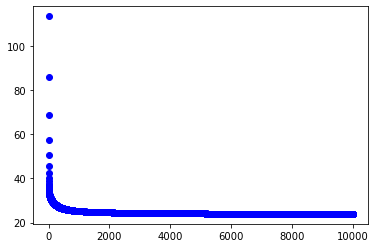

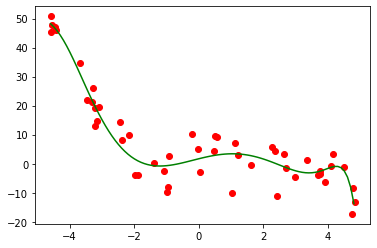

In [24]:
deg = 15
X, mu, sigma = map_feature_and_normalise(feat, deg)

w, J = GradientDescent_np(X, out, lr=0.2)
print('Estimated weights:', w) 

plt.plot(np.arange(len(J)), J, 'bo')  

plt.figure() 
plt.plot(feat, out, 'ro') 

xx = np.arange(min(feat), max(feat), 0.1) #

yy = w[0] * np.ones_like(xx) 
for i in range(1, X.shape[1]):
    yy += w[i] * (xx**i-mu[i])/sigma[i]

plt.plot(xx, yy, 'g') 

print(J[-1])

<font color=blue>**Exercise:** Fit polynomials of all degrees from 0 to 15 and plot the evolution of the final cost (at convergence) with respect to the degree of the model.</font>

Gradient Descent converged after 38 iterations
Gradient Descent converged after 42 iterations
Gradient Descent converged after 46 iterations
Gradient Descent converged after 451 iterations
Gradient Descent converged after 498 iterations
Gradient Descent converged after 5917 iterations


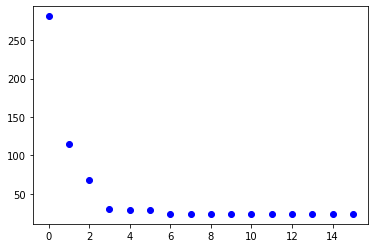

In [25]:
JD = []

for deg in range(0,16):
    X, mu, sigma = map_feature_and_normalise(feat, deg)

    w, J = GradientDescent_np(X, out, lr=0.2)
    JD.append(J[-1])
    
plt.plot(np.arange(len(JD)), JD, 'bo')  


<font color=blue>**Exercise:** Add regularisation to our Gradient Descent algorithm and run gradient descent with a polynomial of degree 15 again. What do you observe?</font>

In [26]:
def GradientDescent_np_modificado_l2(X, y, max_iterations=10000, lr=0.1, epsilon = 0.000001, lamda = 0.1):
    m, n = X.shape # number of samples, number of features
    J = []

    #initialize the weights to zero (or anything else you want, e.g. a small random value)
    w = np.zeros(n)
    
    # Repeat until convergence (or max_iterations)
    for iteration in range(max_iterations):
        grad = np.dot(X.T , (np.dot(X, w) - y)) / m;
        w = w - lr*grad
        j = sum( (np.dot(X, w) - y)**2) + lamda*sum(w**2)
        J.append(j / m)
        
        # Stopping Criterion
        if (iteration > 2) and ( abs(J[-2] - J[-1]) < epsilon):
            print ("Gradient Descent converged after {} iterations".format(iteration))
            break
    return w, J

Gradient Descent converged after 1286 iterations
Estimated weights: [  7.8453003    4.20116402  -1.11819581 -20.90672546  10.494737
  -5.8421219    6.53580536   2.29187899   2.45697837   4.50705714
  -1.20128406   3.55843028  -4.46154815   1.1254595   -7.27456046
  -1.84844778]
26.59046856065092


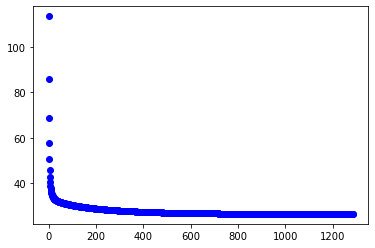

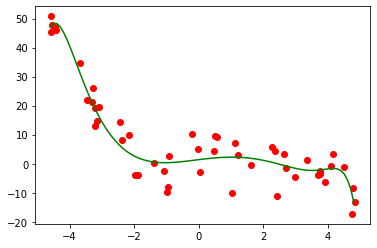

In [27]:
deg = 15
X, mu, sigma = map_feature_and_normalise(feat, deg)

w, J = GradientDescent_np_modificado_l2(X, out, lr=0.2)
print('Estimated weights:', w) 

plt.plot(np.arange(len(J)), J, 'bo')  

plt.figure() 
plt.plot(feat, out, 'ro') 

xx = np.arange(min(feat), max(feat), 0.1) #

yy = w[0] * np.ones_like(xx) 
for i in range(1, X.shape[1]):
    yy += w[i] * (xx**i-mu[i])/sigma[i]

plt.plot(xx, yy, 'g') 

print(J[-1])

---

*Answer*

We can observe that the final value of teh cost function is very similar to the value we obtained without the l2 regularization. Nevertheless, the coefficients are quite diferents between using or not l2 regularization (with the execption of the w0 coefficient which is very similar in the two cases).

---


## 1.4 Logistic Regression

We are given a synthetic dataset comrpising of m samples of two features each, that correspond to either of two classes $[0, 1]$. First load the data and plot it.

In [28]:
# Load the provided dataset
import pickle

with open('./W01_01_LogisticData.pkl', 'rb') as f:
    (X,y) = pickle.load(f, encoding='latin1')

print ("# Samples, # Features:", X.shape)
print ("# target outputs:", y.shape)

# Samples, # Features: (117, 2)
# target outputs: (117,)


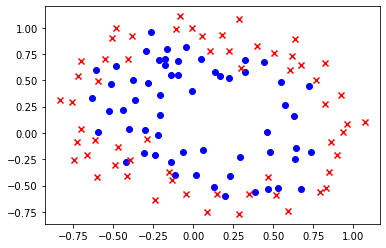

In [29]:
# Plot the data
plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples
plt.show()

We are going train a binary classifier using the Logistic Regression model: $f_w(\textbf{x}) = \frac{1}{1+e^{-w^\intercal \textbf{x}}}$

For this we need to fit the parameters $w$ to our dataset by minimizing the cost function $J$:

$\hat{w} = \underset{w}{\text{minimize}} {1 \over m} \sum_{i=1}^m{-y^{(i)}\log(f_w(x^{(i)}) - (1-y^{(i)})\log(1-f_w(x^{(i)})}$

where $(x^{(i)},y^{(i)})$ is the i-th training sample, and $m$ is the number of samples in the training set.

We are going to use the Gradient Descent algorithm to solve this minimization problem, in pseudo-code:

repeat until convergence (or max. number of iterations) 

{

$w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w)$ (for all j)

}

where $\alpha$ is the learning rate, and the partial derivative (the gradient) of the cost function is given by:

$\frac{\partial}{\partial w_j} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)}) x_j^{(i)}}$

Notice that the partial derivative of our cost function has the same form as for the Linear Regression cost function, however the difference is in the term $f_w(\textbf{x})$, our model. In the case of Logistic Regression $f_w(\textbf{x})$ is the sigmoid function of $w^\intercal \textbf{x}$.

Thus, the Python code of our **GradientDescent** function is going to be quite the same as for Linear Regression, but calling the **sigmoid** function to evaluate the Logistic Regression model $f_w(\textbf{x})$.

In [30]:
import numpy as np

def sigmoid(X):
    '''
    Computes the Sigmoid function of the input argument X.
    '''
    return 1.0/(1+np.exp(-X))


def GradientDescent_logistic(X, y, max_iterations=10000, lr=0.1, epsilon = 0.0000001):
    '''
    Gradient descent function for logistic regression without regularisation.
    X is the design matrix, y is the target outputs (in this case it should have values of either 0 or 1)
    '''    
    m, n = X.shape # number of samples, number of features
    J = []
    
    #initialize the parameters
    w = np.zeros(n)
    
    # Repeat until convergence (or max_iterations)
    for iteration in range(max_iterations):
        f = sigmoid(np.dot(X, w))
        error = (f-y)
        gradient = np.dot(X.T , error) / m
        w = w - lr*gradient
        
        J.append(sum(-y * np.log(f) - (1-y) * np.log(1-f)) / m)
        
        # Stopping Criterion
        if (iteration > 2) and ( abs(J[-2] - J[-1]) < epsilon):
            print ("Gradient Descent converged after {} iterations".format(iteration))
            break
        
    return w, J


def classifyVector(X, w):
    '''
    Evaluate the Logistic Regression model h(x) with theta parameters,
    and returns the predicted label of x.
    '''
    prob = np.sign(np.dot(X, w))
    prob[prob == -1] = 0 # We use zero for the second class, not -1
    return prob

Now, we train the Logistic Regression classifier and draw its decision boundary in a 2D plot.

Gradient Descent converged after 477 iterations
Estimated weights: [-0.00167667 -0.25101695 -0.01889087]
Training Accuracy : 0.5470085470085471


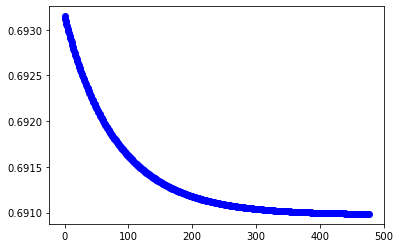

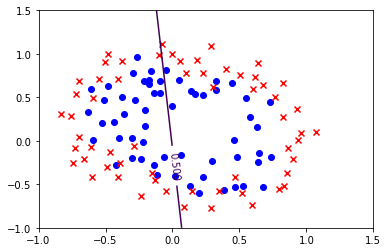

In [31]:
# Number of samples, number of features given
m, n = X.shape

# Append the x_0 column (for the bias term theta_0)
x = np.ones(shape=(m, 1))
Xaugmented = np.append(x, X, axis=1) #The Design Matrix, which is the original data augmented with the first column of ones

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(Xaugmented, y)
print ("Estimated weights:", w)

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')  # To plot the evolution of the Cost (J) we use as x a list of numbers from 1 to the number of elements inside J, and as y the values in J

#Evaluate the classifier accuracy in the training data
out = classifyVector(Xaugmented, w)
print ("Training Accuracy :", float(np.sum(out == y)) / m)

#Plot data
plt.figure()
plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples

#Plot Decision Boundary
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = sigmoid(np.dot(np.array([1,u[i],v[j]]),w))

z = z.T

cs = plt.contour(u, v, z, levels=[0.5])
plt.clabel(cs, inline=1, fontsize=10)
plt.show()

As can be seen in the previous plot the classification boundary with 2 features fits very poorly our data.

One way to fit the data better is to create more features from each data point. We will map the features into all polynomial terms of $x_1$ and $x_2$ up to the $deg$ power. 

$MapFeature(x_1,x_2) = [1, x_1,x_2,x_1^2,x_1x_2,x_2^2,x_1^3, \dots , x_1x_2^{(deg-1)}, x_2^{(deg)}]$

The Logistic Regression classifier trained on such high dimensional feature spaces will have a more complex decision boundary (i.e. more degrees of freedom) and will appear nonlinear when drawn in the 2D plot.

In [32]:
def map_two_features_and_normalise(x1, x2, degree, mu = None, sigma = None):
    '''
    Maps 2D features to quadratic features.
    Returns a new feature vector with more features, comprising of out = [x1, x2, x1^2, x2^2, x1*x2, x1*x2^2, ...]
    If provided, it uses the means and sigmas to normalise the new features, otherwise it calculates the means and sigmas from the data
    '''
    
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    out = np.ones(shape=(x1[:, 0].size, 1))
        
    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    # Normalise the newly created features
    if not isinstance(mu, np.ndarray): #calculate
        mu = np.mean(out, 0) #calculate the mean for every column
    if not isinstance(sigma, np.ndarray):
        sigma = np.std(out, 0, ddof=1) #calculate the standard deviation for every column

    # Scale features and set them to zero mean (standarize)
    # normalize everything except X0 (the artificial first feature that we set to ones)
    for i in range(1, out.shape[1]):
        out[:,i] = (out[:,i] - mu[i]) / sigma[i];

    return out, mu, sigma

Let's try it out for degree = 3. We expect to get an output of 10 features: $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3]$

In [33]:
deg = 3
features, mu, sigma = map_two_features_and_normalise(X[:,0], X[:,1], degree = deg)
print("output has shape:", features.shape) # Should be m rows (equal to the number of data points) and 10 rows (equal to the number of features)
print("Mean (and Sigma) has shape", mu.shape)

output has shape: (117, 10)
Mean (and Sigma) has shape (10,)


Now we will use these new features to do logistic regression

In [34]:
deg = 3
features, mu, sigma = map_two_features_and_normalise(X[:,0], X[:,1], degree = deg)

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(features, y)

out = classifyVector(features, w)
print ("Training Accuracy :", float(np.sum(out == y)) / m)

Gradient Descent converged after 5290 iterations
Training Accuracy : 0.8547008547008547


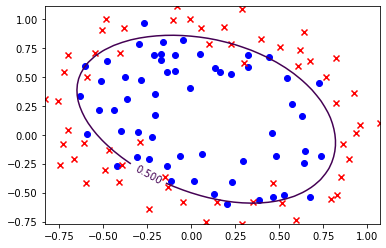

In [35]:
#Plot data
plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples

#Plot Boundary
u = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 40)
v = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 40)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        feature, _, _ = map_two_features_and_normalise(np.array(u[i]),np.array(v[j]), mu=mu, sigma=sigma, degree = deg)
        z[i, j] = sigmoid(feature.dot(w))
        
z = z.T
cs = plt.contour(u, v, z, levels=[0.5])
plt.clabel(cs, inline=1, fontsize=10)
plt.show()

<font color=blue>**Exercise:** Generate features of different degrees, up to degree 15 and run gradient descent. What do you observe?</font>

In [36]:
for deg in range(0,16):
    features, mu, sigma = map_two_features_and_normalise(X[:,0], X[:,1], degree = deg)

    #Logistic Regression gradient descent optimization
    w, J = GradientDescent_logistic(features, y)

    out = classifyVector(features, w)
    print ("Training Accuracy :", float(np.sum(out == y)) / m)
    print()

Gradient Descent converged after 59 iterations
Training Accuracy : 0.5042735042735043

Gradient Descent converged after 148 iterations
Training Accuracy : 0.5470085470085471

Gradient Descent converged after 4340 iterations
Training Accuracy : 0.8547008547008547

Gradient Descent converged after 5290 iterations
Training Accuracy : 0.8547008547008547

Gradient Descent converged after 9161 iterations
Training Accuracy : 0.8376068376068376

Training Accuracy : 0.8717948717948718

Training Accuracy : 0.8803418803418803

Training Accuracy : 0.8803418803418803

Training Accuracy : 0.8888888888888888

Training Accuracy : 0.8888888888888888

Training Accuracy : 0.8974358974358975

Training Accuracy : 0.8974358974358975

Training Accuracy : 0.9145299145299145

Training Accuracy : 0.9145299145299145

Training Accuracy : 0.9145299145299145

Training Accuracy : 0.9145299145299145



---

*Answer*

The trainning accuracy tends to converge a little bit more than 80%, with the exceptions of degree values of 0 and 1 and with degree values bigger than 10 that tends to converge to 90%. It seems the bigger degree the most training accuracy we can obtein. Nevertheless, this could be a effect of a overfitting situation, couse the bigger degree of the function the more can memorice the distribution of te training dataset.

---


<font color=blue>**Exercise:** Add regularisation to our Gradient Descent algorithm and run gradient descent with features of degree up to 15. What do you observe?</font>

In [37]:
def GradientDescent_logistic_modificado_l2(X, y, max_iterations=10000, lr=0.1, epsilon = 0.0000001, lamda = 1):
    '''
    Gradient descent function for logistic regression without regularisation.
    X is the design matrix, y is the target outputs (in this case it should have values of either 0 or 1)
    '''    
    m, n = X.shape # number of samples, number of features
    J = []
    
    #initialize the parameters
    w = np.zeros(n)
    
    # Repeat until convergence (or max_iterations)
    for iteration in range(max_iterations):
        f = sigmoid(np.dot(X, w))
        error = (f-y)
        gradient = np.dot(X.T , error) / m
        w = w - lr*gradient
        
        j = sum(-y * np.log(f) - (1-y) * np.log(1-f)) + lamda*sum(w**2)
        J.append(j / m)
        
        # Stopping Criterion
        if (iteration > 2) and ( abs(J[-2] - J[-1]) < epsilon):
            print ("Gradient Descent converged after {} iterations".format(iteration))
            break
        
    return w, J

In [38]:
for deg in range(0,16):
    features, mu, sigma = map_two_features_and_normalise(X[:,0], X[:,1], degree = deg)

    #Logistic Regression gradient descent optimization
    w, J = GradientDescent_logistic_modificado_l2(features, y)

    out = classifyVector(features, w)
    print ("Training Accuracy :", float(np.sum(out == y)) / m)
    print()

Gradient Descent converged after 54 iterations
Training Accuracy : 0.5042735042735043

Gradient Descent converged after 109 iterations
Training Accuracy : 0.5384615384615384

Gradient Descent converged after 319 iterations
Training Accuracy : 0.8290598290598291

Training Accuracy : 0.8547008547008547

Training Accuracy : 0.8376068376068376

Training Accuracy : 0.8717948717948718

Training Accuracy : 0.8803418803418803

Training Accuracy : 0.8803418803418803

Training Accuracy : 0.8888888888888888

Training Accuracy : 0.8888888888888888

Training Accuracy : 0.8974358974358975

Training Accuracy : 0.8974358974358975

Gradient Descent converged after 298 iterations
Training Accuracy : 0.8376068376068376

Gradient Descent converged after 299 iterations
Training Accuracy : 0.8376068376068376

Training Accuracy : 0.9145299145299145

Training Accuracy : 0.9145299145299145



---

*Answer*

We can observe a similar tendency than without a regularisator. But, in this case, the overfitting seems to have less impact in the model. The training accuracy is tending to 88% and onlu the degree values of 0, 1, 14 and 15 break this tendency (the two first not reaching 60% and the two last obtaining more than 91% of accuracy). We can conclude that the l2 regularisation have a good impact while training the model because avoids (mesurably) the overfitting.

---
